In [103]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os

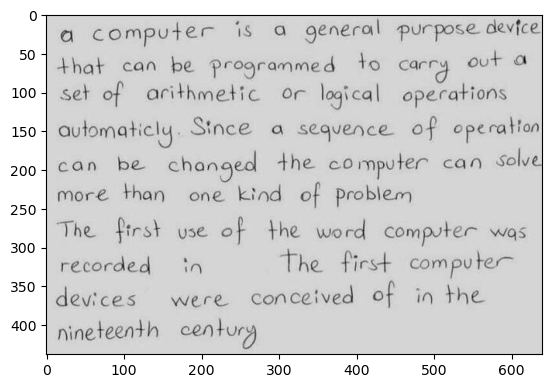

In [3]:
img = cv2.imread('image_2_IAM.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray')

1. thresholding to convert in binary image

In [ ]:
import cv2

# Load the grayscale image
def image_thresolding(image):
    # image = cv2.imread('image_2_IAM.jpg', cv2.IMREAD_GRAYSCALE)

    # Apply adaptive thresholding
    # You can experiment with the 'blockSize' and 'C' values for optimal results
    adaptive_thresh = cv2.adaptiveThreshold(
        image, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        blockSize=15,  # Size of the neighborhood area (must be odd)
        C=10  # Constant subtracted from the mean
    )
    return adaptive_thresh


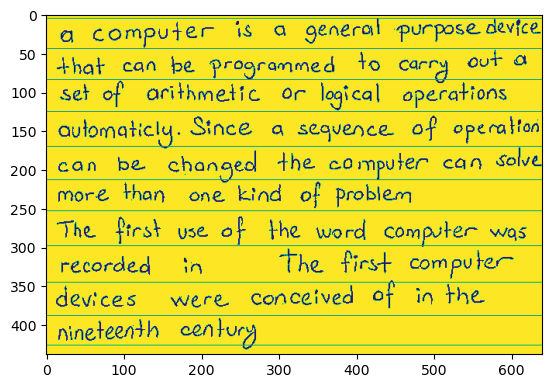

In [89]:
def rows_without_text(adaptive_thresh, text_threshold=30):
    h_projection = np.sum(adaptive_thresh == 0, axis=1)  # Sum binary values along rows
    # some_threshold=30
    # Find rows with low values (i.e., likely to be between lines)
    # Experiment with a threshold for gap detection based on the profile
    line_gaps = np.where(h_projection < text_threshold)[0]
    return line_gaps

# get the final line based on thresold for the number of lines between the two horigental line
# average number of line calculation
    # thresold_width = 0.5*avg_line_width,     0.5 need to be automated or manual entred based on documents

def find_final_lines(line_gaps, line_threshold=50):
    final_lines=[]
    bunch_lines= []
    line_width =[]
    n_line =0
    for i in range(1, len(line_gaps)):
        if line_gaps[i]-line_gaps[i-1]<=1:
            n_line+=1
        else:
            line_width.append(n_line)
            n_line=0   
    avg_line_width = np.mean(line_width)
    thresold_width = line_threshold*avg_line_width/100
    n_line=0
    for i in range(1, len(line_gaps)):
        if line_gaps[i]-line_gaps[i-1]<=1 and i<(len(line_gaps)-1):
            bunch_lines.append(line_gaps[i-1])
            n_line+=1
        else:
            if thresold_width<=n_line:
                final_lines.append(np.mean(bunch_lines).astype(np.int32))
            bunch_lines=[]
            n_line=0
    return final_lines
def save_the_lines(image, lines, path=line_folder_path):
    for i in range(1, len(lines)):
        line_img = image[lines[i-1]:lines[i],0:image.shape[1]]
        cv2.imwrite(path+f'\\line_{i}.png', line_img)
        print(f"line number {i} saved...")

image = cv2.imread('image_2_IAM.jpg', cv2.IMREAD_GRAYSCALE)
threshoded_img = image_thresolding(image)

line_gaps = rows_without_text(threshoded_img, text_threshold=30)
final_lines = find_final_lines(line_gaps, line_threshold=40)
result = threshoded_img.copy()
for y in final_lines:
    cv2.line(result, (0, y), (result.shape[1], y), (128,), 1)
plt.imshow(result)
# line_gaps

In [73]:
line_folder_path = r"D:\Digital Image Processing\Project\Project_code_folder\line_imgs"
save_the_lines(image,final_lines)



line number 1 saved...
line number 2 saved...
line number 3 saved...
line number 4 saved...
line number 5 saved...
line number 6 saved...
line number 7 saved...
line number 8 saved...
line number 9 saved...
line number 10 saved...


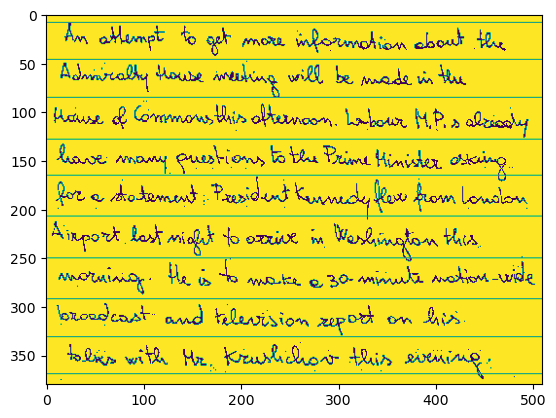

In [57]:

image = cv2.imread('image_1_IAM.jpg', cv2.IMREAD_GRAYSCALE)
threshoded_img = image_thresolding(image)

line_gaps = rows_without_text(threshoded_img, text_threshold=30)
final_lines = find_final_lines(line_gaps, line_threshold=40)
result = threshoded_img.copy()
for y in final_lines:
    cv2.line(result, (0, y), (result.shape[1], y), (128,), 1)
plt.imshow(result)

In [59]:
np.sum(adaptive_thresh == 0, axis=1).min(), np.sum(adaptive_thresh == 0, axis=1).max()
# develop the code which can decide the "text_threshold" value , and "line threshold"
# also here the thresolding algorithem is the main component of the pipeline so it need be checked for the
# different type of images

(0, 171)

In [ ]:
line_folder_path = r"D:\Digital Image Processing\Project\Project_code_folder\line_imgs"

save_the_lines(image,final_lines)

avg_line_width 6.848484848484849
word_1_1 saved...
word_1_2 saved...
word_1_3 saved...
word_1_4 saved...
word_1_5 saved...
word_1_6 saved...
word_1_7 saved...
avg_line_width 5.972972972972973
word_2_1 saved...
word_2_2 saved...
word_2_3 saved...
word_2_4 saved...
word_2_5 saved...
word_2_6 saved...
word_2_7 saved...
word_2_8 saved...
avg_line_width 5.552631578947368
word_3_1 saved...
word_3_2 saved...
word_3_3 saved...
word_3_4 saved...
word_3_5 saved...
word_3_6 saved...
word_3_7 saved...
word_3_8 saved...
avg_line_width 5.514285714285714
word_4_1 saved...
word_4_2 saved...
word_4_3 saved...
word_4_4 saved...
word_4_5 saved...
word_4_6 saved...
avg_line_width 5.918918918918919
word_5_1 saved...
word_5_2 saved...
word_5_3 saved...
word_5_4 saved...
word_5_5 saved...
word_5_6 saved...
word_5_7 saved...
word_5_8 saved...
word_5_9 saved...
word_5_10 saved...
avg_line_width 4.935483870967742
word_6_1 saved...
word_6_2 saved...
word_6_3 saved...
word_6_4 saved...
word_6_5 saved...
word_6_6 

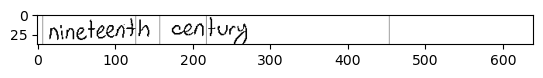

In [107]:
# words segmentation
word_folder_path = r"D:\Digital Image Processing\Project\Project_code_folder\word_imgs"

def cols_without_text(adaptive_thresh, text_threshold=2):
    h_projection = np.sum(adaptive_thresh == 0, axis=0)  # Sum binary values along cols
    # some_threshold=30
    # Find rows with low values (i.e., likely to be between lines)
    # Experiment with a threshold for gap detection based on the profile
    line_gaps = np.where(h_projection < text_threshold)[0]
    return line_gaps

# get the final line based on thresold for the number of lines between the two horigental line
# average number of line calculation
    # thresold_width = 0.5*avg_line_width,     0.5 need to be automated or manual entred based on documents

def find_final_lines(line_gaps, line_threshold=100):
    final_lines=[]
    bunch_lines= []
    line_width =[]
    n_line =0
    for i in range(1, len(line_gaps)):
        if line_gaps[i]-line_gaps[i-1]<=1:
            n_line+=1
        else:
            line_width.append(n_line)
            n_line=0   
    avg_line_width = np.mean(line_width)
    print('avg_line_width',avg_line_width)
    thresold_width = line_threshold*avg_line_width/100
    n_line=0
    for i in range(1, len(line_gaps)):
        if line_gaps[i]-line_gaps[i-1]<=1 and i<(len(line_gaps)-1):
            bunch_lines.append(line_gaps[i-1])
            n_line+=1
        else:
            if thresold_width<=n_line:
                final_lines.append(np.mean(bunch_lines).astype(np.int32))
            bunch_lines=[]
            n_line=0
    return final_lines
def save_the_words(image,line_number, lines, path=word_folder_path):
    for i in range(1, len(lines)):
        line_img = image[0:image.shape[1], lines[i-1]:lines[i]]
        cv2.imwrite(path+f'\\word_{line_number}_{i}.png', line_img)
        print(f"word_{line_number}_{i} saved...")

for line_number in range(1,1+len(os.listdir(line_folder_path))):
    # line_number=1
    image = cv2.imread(line_folder_path+f'\\line_{line_number}.png', cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    threshoded_img = image_thresolding(image)
    plt.imshow(threshoded_img, cmap='gray')

    line_gaps = cols_without_text(threshoded_img, text_threshold=2)
    final_lines = find_final_lines(line_gaps, line_threshold=100)
    result = threshoded_img.copy()
    for x in final_lines:
        cv2.line(result, (x, 0), (x,result.shape[0]), (128,), 1)
    plt.imshow(result, cmap='gray')

    save_the_words(image,line_number,final_lines,word_folder_path)
# find the method to find the automatic line_threshold and text_threshold

In [105]:
len(os.listdir(line_folder_path))

10

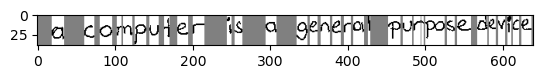

In [93]:
result = threshoded_img.copy()
for x in line_gaps:
    cv2.line(result, (x, 0), (x,result.shape[0]), (128,), 1)
plt.imshow(result, cmap='gray')

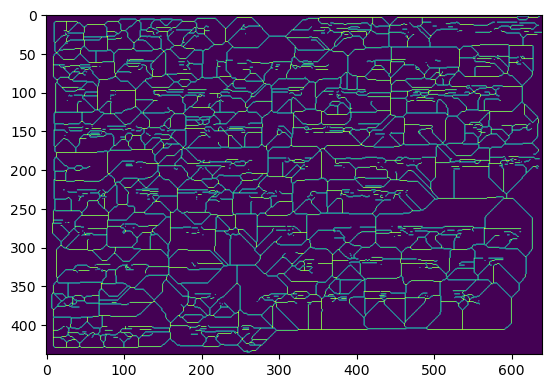

In [9]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, remove_small_objects
from skimage.filters import sobel

# Load the grayscale image
image = cv2.imread('image_2_IAM.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Piece-wise Painting Algorithm
# 1.1 Calculation of average width of components
# Use connected component analysis to find components and their width
_, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)
average_width = np.mean(stats[1:, cv2.CC_STAT_WIDTH])

# 1.2-1.5: Stripping, painting, and smoothing based on width and gaps
# This can involve morphological operations to isolate text lines
# For simplicity, perform Gaussian smoothing here
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Dilation Process
# Removing black rectangles and applying horizontal dilation
dilated = cv2.dilate(smoothed_image, cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1)))

# Step 3: Trimming Process
# Apply the Sobel filter to remove vertical connectivities
sobel_edges = sobel(dilated)
# Threshold the Sobel output and remove small vertical lines
_, trimmed = cv2.threshold((sobel_edges * 255).astype(np.uint8), 0, 255, cv2.THRESH_BINARY)

# Step 4: Constructing Separating Lines
# Find contours, connect lines with minimum distance, and extend them
# Using contours for line analysis
contours, _ = cv2.findContours(trimmed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w < average_width:  # Adjust based on average width
        cv2.line(trimmed, (x, y), (x + w, y), (255, 255, 255), 1)

# Step 5: Resolving Overlapping/Touching
# Detect and resolve overlapping lines
# This part would include contour traversal or finding minimum widths to segment
# Further image processing can be done here if needed

# Step 6: Complementing and Thinning
# Invert image colors
complemented = cv2.bitwise_not(trimmed)
# Thinning to get skeleton
skeleton = skeletonize(complemented // 255).astype(np.uint8) * 255

# Final Result
# cv2.imshow("Final Text-line Segmentation Result", skeleton)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(skeleton)